In [8]:
from FlagEmbedding import BGEM3FlagModel
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
import pandas as pd

# 加载模型
model_path = r"C:\Users\k\Desktop\BaiduSyncdisk\baidu_sync_documents\hf_models\bge-m3"
model = BGEM3FlagModel(model_path, use_fp16=True)

# 样本新闻标题集合（涵盖科技、体育、政治、娱乐和健康五个主题）
news_titles = [
    # 科技主题
    "苹果发布最新iPhone 15系列，搭载A17芯片",
    "谷歌推出新一代人工智能助手，支持自然语言理解",
    "特斯拉自动驾驶技术获突破，事故率降低30%",
    "微软宣布收购AI初创公司，强化云服务能力",
    
    # 体育主题
    "梅西在巴黎首秀进球，球迷欢呼雀跃",
    "东京奥运会闭幕，中国队金牌榜位列第二",
    "NBA季后赛：湖人击败热火，夺得总冠军",
    "国足世预赛不敌日本队，出线形势严峻",
    
    # 政治主题
    "中美元首通话，就双边关系交换意见",
    "欧盟通过新气候法案，承诺2050年实现碳中和",
    "联合国大会召开，各国领导人讨论全球治理",
    "英国宣布脱欧后新贸易政策，加强与亚洲合作",
    
    # 娱乐主题
    "新电影《沙丘》全球热映，票房突破4亿美元",
    "流行歌手泰勒·斯威夫特发布新专辑，粉丝热情高涨",
    "网飞热门剧集《鱿鱼游戏》创收视纪录",
    "奥斯卡颁奖典礼举行，《无依之地》获最佳影片",
    
    # 健康主题
    "新研究发现常规锻炼可降低阿尔茨海默病风险",
    "全球新冠疫苗接种突破30亿剂，发展中国家覆盖率仍低",
    "医学专家建议减少超加工食品摄入，降低慢性病风险",
    "心理健康问题在年轻人中上升，专家呼吁加强关注"
]

# 生成文本向量
news_vectors = model.encode(news_titles)['dense_vecs']

# 对向量进行归一化，准备基于余弦相似度的聚类
normalized_vectors = normalize(news_vectors, norm='l2')

# 使用归一化向量进行K-means聚类(等效于基于余弦相似度)
kmeans = KMeans(
    n_clusters=5, 
    init='k-means++',
    n_init=10,
    random_state=42
)
clusters = kmeans.fit_predict(normalized_vectors)

# 创建结果DataFrame
results_df = pd.DataFrame({
    'title': news_titles,
    'cluster': clusters
})

# 打印每个簇的新闻标题
for cluster_id in range(5):
    print(f"\n=== 簇 {cluster_id} ===")
    cluster_titles = results_df[results_df['cluster'] == cluster_id]['title']
    for title in cluster_titles:
        print(f"- {title}")

# 计算聚类评估指标
silhouette_avg = silhouette_score(normalized_vectors, clusters)
print(f"\n聚类轮廓系数: {silhouette_avg:.4f}")

You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.



=== 簇 0 ===
- 东京奥运会闭幕，中国队金牌榜位列第二
- 国足世预赛不敌日本队，出线形势严峻

=== 簇 1 ===
- 梅西在巴黎首秀进球，球迷欢呼雀跃
- NBA季后赛：湖人击败热火，夺得总冠军
- 新电影《沙丘》全球热映，票房突破4亿美元
- 流行歌手泰勒·斯威夫特发布新专辑，粉丝热情高涨
- 网飞热门剧集《鱿鱼游戏》创收视纪录
- 奥斯卡颁奖典礼举行，《无依之地》获最佳影片

=== 簇 2 ===
- 苹果发布最新iPhone 15系列，搭载A17芯片
- 谷歌推出新一代人工智能助手，支持自然语言理解
- 特斯拉自动驾驶技术获突破，事故率降低30%
- 微软宣布收购AI初创公司，强化云服务能力
- 欧盟通过新气候法案，承诺2050年实现碳中和
- 英国宣布脱欧后新贸易政策，加强与亚洲合作

=== 簇 3 ===
- 中美元首通话，就双边关系交换意见
- 联合国大会召开，各国领导人讨论全球治理
- 全球新冠疫苗接种突破30亿剂，发展中国家覆盖率仍低

=== 簇 4 ===
- 新研究发现常规锻炼可降低阿尔茨海默病风险
- 医学专家建议减少超加工食品摄入，降低慢性病风险
- 心理健康问题在年轻人中上升，专家呼吁加强关注

聚类轮廓系数: 0.0564


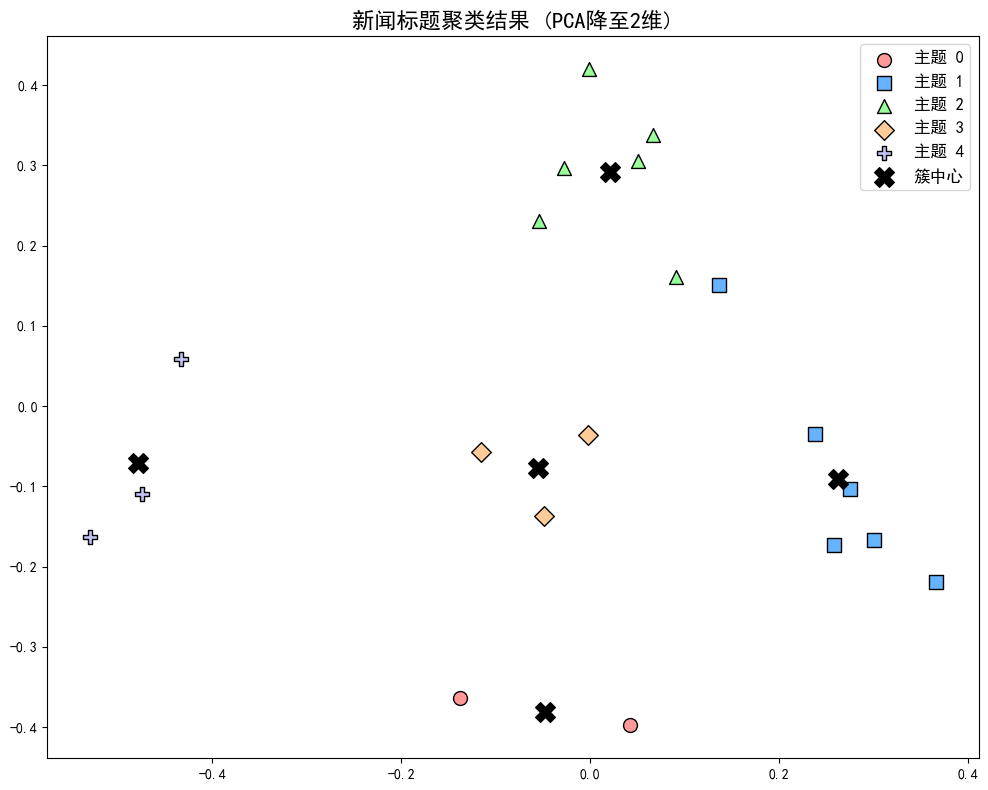

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# 显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 使用PCA降维以便可视化
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(news_vectors)

# 设置绘图样式
plt.figure(figsize=(10, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
markers = ['o', 's', '^', 'D', 'P']

# 绘制数据点
for i in range(5):
    # 获取当前簇的点
    cluster_points = reduced_vectors[clusters == i]
    # 绘制该簇的所有点
    plt.scatter(
        cluster_points[:, 0], 
        cluster_points[:, 1], 
        c=colors[i], 
        marker=markers[i], 
        label=f'主题 {i}',
        s=100,
        edgecolors='black'
    )

# 绘制簇中心
centers_reduced = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    centers_reduced[:, 0], 
    centers_reduced[:, 1], 
    c='black', 
    marker='X', 
    s=200, 
    label='簇中心'
)

# 添加图例和标题
plt.legend(fontsize=12)
plt.title('新闻标题聚类结果 (PCA降至2维)', fontsize=16)
plt.tight_layout()
plt.savefig('news_clusters_visualization.png', dpi=300)
plt.show()

In [ ]:
from FlagEmbedding import BGEM3FlagModel
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# 加载模型
model_path = r"C:\Users\k\Desktop\BaiduSyncdisk\baidu_sync_documents\hf_models\bge-m3"
model = BGEM3FlagModel(model_path, use_fp16=True)

def diversity_enhanced_retrieval(query, doc_vectors, doc_texts, top_k=5, diversity_clusters=3):
    """
    返回多样化的检索结果，覆盖不同语义簇。
    
    Args:
        query (str): 查询文本
        doc_vectors (np.ndarray): 文档向量集合
        doc_texts (list): 文档文本列表
        top_k (int): 返回的文档数量
        diversity_clusters (int): 聚类数量
        
    Returns:
        list: 选择的文档索引列表
    """
    # 编码查询并计算相似度
    query_vec = model.encode([query])['dense_vecs'][0]
    similarities = cosine_similarity([query_vec], doc_vectors)[0]
    
    # 获取候选文档
    top_n = min(top_k * 3, len(doc_vectors))
    candidate_indices = np.argsort(similarities)[-top_n:][::-1]
    candidate_vectors = doc_vectors[candidate_indices]
    
    # 执行K-means聚类
    kmeans = KMeans(n_clusters=min(diversity_clusters, len(candidate_vectors)), 
                   random_state=42, n_init=10)
    clusters = kmeans.fit_predict(candidate_vectors)
    
    # 从每个簇中选择最相似文档
    selected_indices = []
    cluster_dict = {}
    
    # 按簇分组并记录相似度
    for idx, cluster_id in enumerate(clusters):
        cluster_dict.setdefault(cluster_id, []).append((candidate_indices[idx], similarities[candidate_indices[idx]]))
    
    # 从每个簇中选最佳文档
    for cluster_id in range(min(diversity_clusters, len(cluster_dict))):
        if cluster_dict.get(cluster_id):
            best_doc = max(cluster_dict[cluster_id], key=lambda x: x[1])[0]
            selected_indices.append(best_doc)
    
    # 补充不足的文档
    remaining = [i for i in candidate_indices if i not in selected_indices]
    if len(selected_indices) < top_k and remaining:
        remaining_similarities = [similarities[i] for i in remaining]
        extra_indices = [remaining[i] for i in np.argsort(remaining_similarities)[-top_k + len(selected_indices):]]
        selected_indices.extend(extra_indices)
    
    return selected_indices[:top_k]

# 生成示例新闻标题和向量
def generate_sample_news_data(n_docs=20):
    """生成模拟新闻标题及其向量"""
    # 中文新闻标题示例
    news_titles = [
        "人工智能在医学研究中取得重大突破",
        "新兴科技初创公司融资达数十亿",
        "气候变化影响全球农业发展",
        "2025年量子计算技术取得新进展",
        "人工智能模型预测股市趋势",
        "可再生能源超过传统化石燃料",
        "癌症治疗新突破得益于AI技术",
        "科技巨头面临新的隐私法规",
        "全球数据泄露事件创历史新高",
        "AI助手变得更加人性化",
        "自动驾驶汽车革新交通运输",
        "气候技术获得巨额投资支持",
        "新AI算法解决复杂问题",
        "数字化时代网络安全威胁上升",
        "医疗AI减少诊断错误",
        "技术创新推动经济增长",
        "AI驱动的机器人进入职场",
        "可持续技术解决方案受到关注",
        "数据科学改变商业策略",
        "量子AI研究开启新领域"
    ]
    
    # 如果需要更多文档，重复标题列表
    news_titles = news_titles[:n_docs] if len(news_titles) >= n_docs else news_titles * (n_docs // len(news_titles) + 1)
    news_titles = news_titles[:n_docs]
    
    # 生成向量
    news_vectors = model.encode(news_titles)['dense_vecs']
    return news_vectors, news_titles

# 测试代码
if __name__ == "__main__":
    # 生成测试数据
    doc_vectors, doc_texts = generate_sample_news_data(n_docs=20)
    
    # 测试查询
    query = "人工智能研究进展"
    result_indices = diversity_enhanced_retrieval(query, doc_vectors, doc_texts, top_k=5, diversity_clusters=3)
    
    # 打印结果
    print("查询:", query)
    print("\n检索结果:")
    similarities = cosine_similarity([model.encode([query])['dense_vecs'][0]], doc_vectors)[0]
    for idx in result_indices:
        print(f"文档 {idx}: {doc_texts[idx]} (相似度: {similarities[idx]:.4f})")

基于余弦相似度的聚类轮廓系数: 0.0564
